In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
import datetime
BUFFER_SIZE = 70_000 # for reshuffling
BATCH_SIZE = 128
NUM_EPOCHS = 20


In [3]:
mnist_dataset, mnist_info = tfds.load(name='mnist', with_info=True, as_supervised=True)
mnist_train, mnist_test = mnist_dataset['train'], mnist_dataset['test']

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [4]:
def scale(image, label):
    image = tf.cast(image, tf.float32)
    image /= 255.

    return image, label

In [5]:
train_and_validation_data = mnist_train.map(scale)
test_data = mnist_test.map(scale)

In [6]:
num_validation_samples = 0.1 * mnist_info.splits['train'].num_examples
num_validation_samples = tf.cast(num_validation_samples, tf.int64)

In [7]:
num_test_samples = mnist_info.splits['test'].num_examples
num_test_samples = tf.cast(num_test_samples, tf.int64)

In [8]:
train_and_validation_data = train_and_validation_data.shuffle(BUFFER_SIZE)

In [9]:
train_data = train_and_validation_data.skip(num_validation_samples)
validation_data = train_and_validation_data.take(num_validation_samples)

In [10]:
train_data = train_data.batch(BATCH_SIZE)
validation_data = validation_data.batch(num_validation_samples)
test_data = test_data.batch(num_test_samples)

In [11]:
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(50,5,activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(50,3,activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10)


])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary(line_length=75)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                   ┃ Output Shape            ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                │ (None, 24, 24, 50)      │        1,300 │
├────────────────────────────────┼─────────────────────────┼──────────────┤
│ max_pooling2d (MaxPooling2D)   │ (None, 12, 12, 50)      │            0 │
├────────────────────────────────┼─────────────────────────┼──────────────┤
│ conv2d_1 (Conv2D)              │ (None, 10, 10, 50)      │       22,550 │
├────────────────────────────────┼─────────────────────────┼──────────────┤
│ max_pooling2d_1 (MaxPooling2D) │ (None, 5, 5, 50)        │            0 │
├────────────────────────────────┼─────────────────────────┼──────────────┤
│ flatten (Flatten)              │ (None, 1250)            │            0 │
├────────────────────────────────┼─────────────────────────┼──────────────┤
│ dense (Dense)                  │ (None, 10)              │       12,510 │
└────────────────────────────────┴─────────────────────────┴──────────────┘

 Total params: 36,360 (142.03 KB)

 Trainable params: 36,360 (142.03 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [14]:
model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

In [15]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_loss',
    mode = 'auto',
    min_delta = 0,
    patience = 2,
    verbose = 0,
    restore_best_weights = True
)

In [16]:
model.fit(
    train_data,
    epochs = NUM_EPOCHS,
    callbacks = [early_stopping],
    validation_data = validation_data,
    verbose = 2
)

Epoch 1/20
422/422 - 66s - 157ms/step - accuracy: 0.9180 - loss: 0.2781 - val_accuracy: 0.9723 - val_loss: 0.0899
Epoch 2/20
422/422 - 74s - 176ms/step - accuracy: 0.9789 - loss: 0.0700 - val_accuracy: 0.9750 - val_loss: 0.0824
Epoch 3/20
422/422 - 55s - 130ms/step - accuracy: 0.9835 - loss: 0.0541 - val_accuracy: 0.9882 - val_loss: 0.0394
Epoch 4/20
422/422 - 54s - 128ms/step - accuracy: 0.9867 - loss: 0.0440 - val_accuracy: 0.9898 - val_loss: 0.0357
Epoch 5/20
422/422 - 82s - 195ms/step - accuracy: 0.9885 - loss: 0.0370 - val_accuracy: 0.9893 - val_loss: 0.0322
Epoch 6/20
422/422 - 81s - 191ms/step - accuracy: 0.9898 - loss: 0.0320 - val_accuracy: 0.9925 - val_loss: 0.0253
Epoch 7/20
422/422 - 82s - 194ms/step - accuracy: 0.9914 - loss: 0.0285 - val_accuracy: 0.9935 - val_loss: 0.0184
Epoch 8/20
422/422 - 83s - 196ms/step - accuracy: 0.9922 - loss: 0.0249 - val_accuracy: 0.9958 - val_loss: 0.0193
Epoch 9/20
422/422 - 81s - 192ms/step - accuracy: 0.9931 - loss: 0.0223 - val_accuracy: 

In [17]:
test_loss, test_accuracy = model.evaluate(test_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.9894 - loss: 0.0317


In [18]:
print('Test loss: {0:.4f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100.))

Test loss: 0.0317. Test accuracy: 98.94%


In [19]:
import matplotlib.pyplot as plt
import numpy as np

In [30]:
for images, labels in test_data.take(1):
    images_test = images.numpy()
    labels_test = labels.numpy()

images_plot = np.reshape(images_test, (10000,28,28))


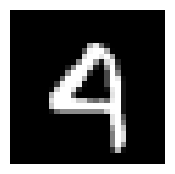

Label: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


<BarContainer object of 10 artists>

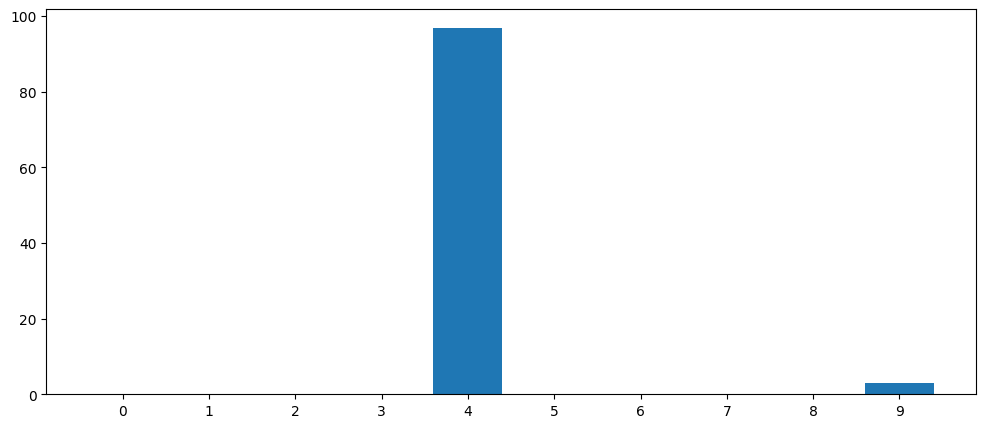

In [31]:
i = 215


# Plot the image
plt.figure(figsize=(2, 2))
plt.axis('off')
plt.imshow(images_plot[i-1], cmap="gray", aspect='auto')
plt.show()

# Print the correct label for the image
print("Label: {}".format(labels_test[i-1]))
predictions = model.predict(images_test[i-1:i])

# Convert those predictions into probabilities (recall that we incorporated the softmaxt activation into the loss function)
probabilities = tf.nn.softmax(predictions).numpy()
# Convert the probabilities into percentages
probabilities = probabilities*100


# Create a bar chart to plot the probabilities for each class
plt.figure(figsize=(12,5))
plt.bar(x=[1,2,3,4,5,6,7,8,9,10], height=probabilities[0], tick_label=["0","1","2","3","4","5","6","7","8","9"])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


<BarContainer object of 10 artists>

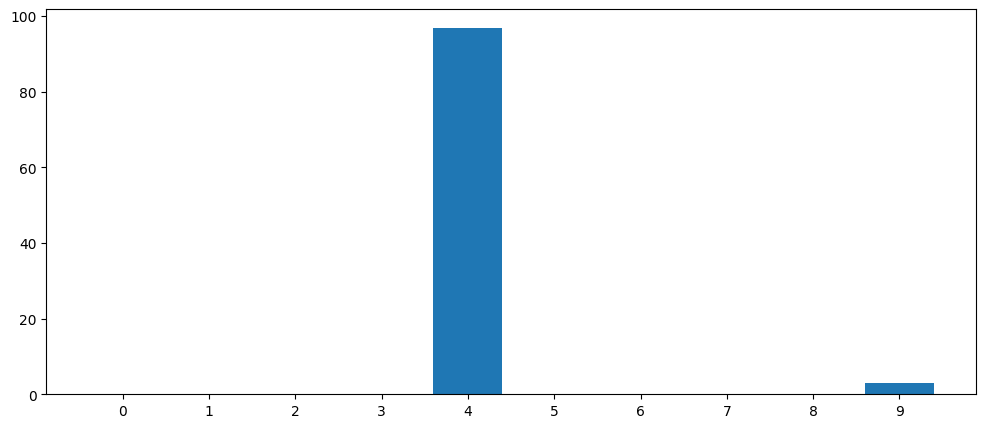

In [29]:
predictions = model.predict(images_test[i-1:i])

# Convert those predictions into probabilities (recall that we incorporated the softmaxt activation into the loss function)
probabilities = tf.nn.softmax(predictions).numpy()
# Convert the probabilities into percentages
probabilities = probabilities*100


# Create a bar chart to plot the probabilities for each class
plt.figure(figsize=(12,5))
plt.bar(x=[1,2,3,4,5,6,7,8,9,10], height=probabilities[0], tick_label=["0","1","2","3","4","5","6","7","8","9"])